In [1]:
#falar do lifecycle
!pip install yellowbrick
!pip install imblearn

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from numpy.random import RandomState
from sklearn.metrics import *

import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.target import ClassBalance
from yellowbrick.target import FeatureCorrelation

from yellowbrick.features import RadViz
from yellowbrick.features import Rank2D

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import DiscriminationThreshold

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import boto3
from sagemaker import get_execution_role
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri


import seaborn as sns
import matplotlib.pyplot as plt

# Carrega arquivo do S3
bucket workshop-pucminas-wcdbda

In [2]:
region = boto3.Session().region_name

In [3]:
region

'us-east-1'

In [4]:
bucket = "workshop-pucminas-wcdbda"
prefix = "datasets"
role = get_execution_role()

In [5]:
df = pd.read_csv("s3://"+bucket+"/"+prefix+"/creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploração de Dados

# Análise do Target

In [11]:
X = df.drop(columns=["Class"])
y = df["Class"]

## Distribuição Classes

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


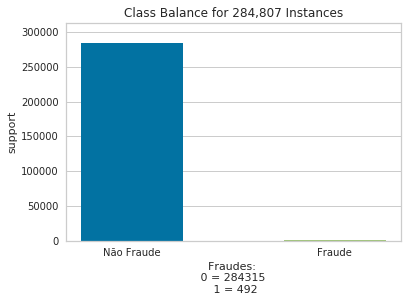

In [12]:
visualizer = ClassBalance(labels=["Não Fraude", "Fraude"])
plt.title("0 - Não Fraude | 1 - Fraude")
plt.xlabel("Fraudes: \n 0 = 284315 \n 1 = 492")
visualizer.fit(y) 
visualizer.show() 


## Correlação das features com o target

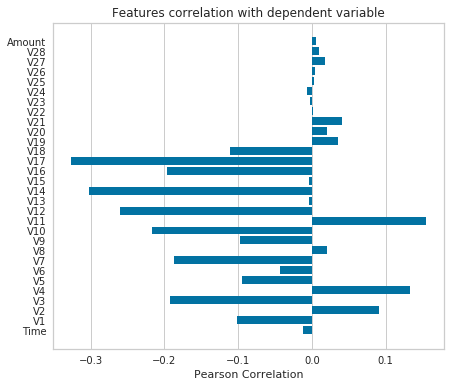

In [13]:
plt.figure(figsize=(7,6))
visualizer = FeatureCorrelation(labels=X.columns)
visualizer.fit(X,y) 
visualizer.show() 

## Correlação de Pearson

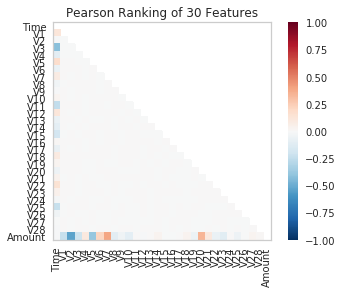

In [14]:
visualizer = Rank2D(algorithm='pearson')
#visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y) 
visualizer.transform(X)
visualizer.show()  

## Analise das Variaveis

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


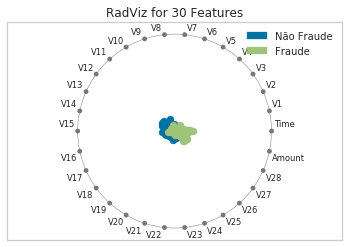

In [15]:
classes = ["Não Fraude", "Fraude"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

# Treinamento

## Transformação 
## Split data e Upload S3
- train -> dados para treinar o modelo
- valid -> avaliar o progresso do modelo

In [20]:
def convert_data():
    rng = RandomState()
    train = df.sample(frac=0.7, random_state=rng)
    valid = df.loc[~df.index.isin(train.index)]
    train_undersampling = train.copy()
    train_oversampling = train.copy()
    
    data_partitions = [('train', train), ('validation', valid),
                       ('train_under', train_undersampling), \
                       ('train_smote', train_oversampling)]
    
    for data_partition_name, data_partition in data_partitions:
        labels = data_partition[["Class"]].values
        features = data_partition.drop(columns=["Class"]).values
        
        if data_partition_name == "train_under":
            rus = RandomUnderSampler()
            features, labels = rus.fit_sample(features,labels)
            labels = labels.reshape(-1,1)
            
        if data_partition_name == "train_smote":
            smote = SMOTE()
            features, labels = smote.fit_sample(features,labels) 
            labels = labels.reshape(-1,1)
        
        #LABEL, FEATURES
        data = np.concatenate((labels, features), axis=1)
        
        np.savetxt('data.csv', data, delimiter=',')
        
        print('{}: {}'.format(data_partition_name, data.shape))
        
        key = "{}/{}/data.csv".format(prefix,data_partition_name)
        url = 's3://{}/{}'.format(bucket, key)
        boto3.Session().resource('s3').Bucket(bucket).Object(key).upload_file('data.csv')
        print('Done writing to {}'.format(url))
        
convert_data()

train: (199365, 31)
Done writing to s3://workshop-pucminas-wcdbda/datasets/train/data.csv
validation: (85442, 31)
Done writing to s3://workshop-pucminas-wcdbda/datasets/validation/data.csv
train_under: (692, 31)
Done writing to s3://workshop-pucminas-wcdbda/datasets/train_under/data.csv


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_smote: (398038, 31)
Done writing to s3://workshop-pucminas-wcdbda/datasets/train_smote/data.csv


## Algoritmo
Para treinar, implantar e validar o modelo:
- 1) <b> Python SDK do Amazon SageMaker </b>
- 2) AWS SDK para Python (boto3)

<b> Qual a diferença do 1 e 2? </b> 
- 1) Abstrai complementamente a complexidade da infraestura. Focado na experimentação de ML
- 2) Oferece controle total sobre a API sagemaker, como se tivesse utilizando uma maquina virtual (EC2, por exemplo). Isto requer operações de nível mais baixo, mais verboso. Esse SDK é melhor para ambiente produção, automatização, etc.

### Qual algoritmo?
- Lista de algoritmos do SageMaker -> https://docs.aws.amazon.com/pt_br/sagemaker/latest/dg/algos.html
- Vamos utilizar o <b> XGBoost </b>

## 1) Python SDK do Amazon SageMaker

### Obter o contêiner do algoritmo

In [21]:
container = get_image_uri(boto3.Session().region_name, 'xgboost')
container

	get_image_uri(region, 'xgboost', '0.90-1').


'811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:1'

### Obter dados do S3

In [22]:
train_data = 's3://{}/{}/{}'.format(bucket, prefix, 'train')
train_under_data = 's3://{}/{}/{}'.format(bucket, prefix, 'train_under')
train_smote_data = 's3://{}/{}/{}'.format(bucket, prefix, 'train_smote')

validation_data = 's3://{}/{}/{}'.format(bucket, prefix, 'validation')

s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model_sdk')

### Criação do Estimator 1

In [23]:
xgb_model = sagemaker.estimator.Estimator(container,
                                         role, 
                                         train_instance_count=1, 
                                         train_instance_type='ml.m4.xlarge',
                                         train_volume_size = 5,
                                         output_path=s3_output_location,
                                         sagemaker_session=sagemaker.Session())

- <b>role</b> – A função do AWS Identity and Access Management (IAM) 
- <b>train_instance_count </b> - número de instâncias para treinar o modelo
- <b>train_instance_type </b> - tipo de instância para treinar o modelo
- <b>output_path</b> - onde será armazenado o resultado
- <b>sagemaker_session</b> - objeto que gerencia as sessões com APIs do Amazon Sage Maker e outros serviços

### Hiperparâmetros para treinar
- Quais são? https://docs.aws.amazon.com/pt_br/sagemaker/latest/dg/xgboost_hyperparameters.html

In [24]:
xgb_model.set_hyperparameters(max_depth = 5,
                              eta = .2,
                              gamma = 4,
                              min_child_weight = 6,
                              silent = 0,
                              objective = "multi:softmax",
                              num_class = 10,
                              num_round = 10)

### Criação dos canais de treinamento

In [25]:
train_channel = sagemaker.session.s3_input(train_data, content_type='text/csv')
train_under_channel = sagemaker.session.s3_input(train_under_data, content_type='text/csv')
train_smote_channel = sagemaker.session.s3_input(train_smote_data, content_type='text/csv')
valid_channel = sagemaker.session.s3_input(validation_data, content_type='text/csv')

data_channels_1 = {'train': train_channel, 'validation': valid_channel}
data_channels_2 = {'train': train_under_channel, 'validation': valid_channel}
data_channels_3 = {'train': train_smote_channel, 'validation': valid_channel}

### Treinar

In [26]:
%%time
xgb_model.fit(inputs=data_channels_2,  logs=True)

2019-11-28 10:59:18 Starting - Starting the training job...
2019-11-28 10:59:19 Starting - Launching requested ML instances......
2019-11-28 11:00:23 Starting - Preparing the instances for training......
2019-11-28 11:01:20 Downloading - Downloading input data...
2019-11-28 11:02:17 Training - Training image download completed. Training in progress.
2019-11-28 11:02:17 Uploading - Uploading generated training model.Arguments: train
[2019-11-28:11:02:12:INFO] Running standalone xgboost training.
[2019-11-28:11:02:12:INFO] File size need to be processed in the node: 64.85mb. Available memory size in the node: 8514.9mb
[2019-11-28:11:02:12:INFO] Determined delimiter of CSV input is ','
[11:02:12] S3DistributionType set as FullyReplicated
[11:02:12] 734x30 matrix with 22020 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2019-11-28:11:02:12:INFO] Determined delimiter of CSV input is ','
[11:02:12] S3DistributionType set as FullyReplicated
[11:02:12] 8544


2019-11-28 11:02:24 Completed - Training job completed
Training seconds: 64
Billable seconds: 64
CPU times: user 422 ms, sys: 29.3 ms, total: 451 ms
Wall time: 3min 42s


# Implantação

In [28]:
%%time
xgb_predictor = xgb_model.deploy(initial_instance_count=1,
                                 instance_type='ml.m4.xlarge',
                                 endpoint_name='xgboost-data-under')#endpoint_name='xgboost-data-smote')#endpoint_name='xgboost-data-randon-over-sample') #endpoint_name='xgboost-data-default')
                                 #
                                 #endpoint_name='xgboost-data-smote')

---------------------------------------------------------------------------------------------------------------!CPU times: user 558 ms, sys: 30.9 ms, total: 589 ms
Wall time: 9min 20s


# Validação

In [71]:
from sagemaker.predictor import csv_serializer, json_deserializer

In [72]:
xgb_predictor.content_typentent_type = "text/csv"
xgb_predictor.serializer = csv_serializer
xgb_predictor.deserializer = None

In [91]:
df_teste = pd.read_csv("s3://workshop-pucminas-wcdbda/datasets/train/data", header=None)

In [140]:
X_test = df_teste.iloc[:,1:]
y_true = df_teste.iloc[:,0].values

In [113]:
result = xgb_predictor.predict(arr_test[:2].values)

In [114]:
result

b'0.0,0.0'

In [ ]:
predictions = []
for arr in np.array_split(X_test,100):
    #break
    result = xgb_predictor.predict(arr.values)
    result = result.decode("utf-8")
    result = result.split(',')
    #print (arr.shape)
    predictions += [float(r) for r in result]

In [130]:
len(predictions)

199365

In [131]:
arr_test.shape

(199365, 30)

In [132]:
def metricas_classificacao(y_true, y_pred, classes, normalize=False, title="Matriz de confusão"):
    resultados = {'matriz confusão': confusion_matrix(y_true, y_pred),
                  'acurácia': accuracy_score(y_true, y_pred),
                  'f1 score': f1_score(y_true, y_pred),
                  'precision': precision_score(y_true, y_pred),
                  'recall': recall_score(y_true, y_pred),
                  'roc auc': roc_auc_score(y_true, y_pred)
                 }        
    return resultados

In [141]:
resultados = calcular_classificacao(y_true, predictions, [0,1])

In [142]:
resultados

{'matriz confusão': array([[197415,   1589],
        [    10,    351]]),
 'acurácia': 0.9919795350237003,
 'f1 score': 0.30508474576271183,
 'precision': 0.1809278350515464,
 'recall': 0.9722991689750693,
 'roc auc': 0.9821572024248626}

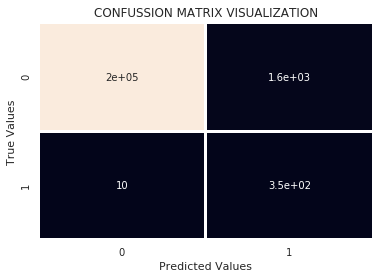

In [159]:
sns.heatmap(confusion_matrix(y_test_true, predictions),annot=True,cbar=False, cmap='Blues', fmt='g')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

# Testar no postman